<center><font color=#555555><font size=6> Programación Genética para Ingeniería de Variables: Aplicación en Sistemas de Trading con Criptomonedas </font> <br> <br>

<center><font color=#555555><font size=4> Genetic Programming for Feature Engineering: An application in Trading System with Cryptocurrencies </font> <br> <br>

<center><font color=#555555><font size=5> DataDays2021 Virtual </font> <br> <br> <br>

<center><font color=#555555><font size=5> FranciscoME </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Marzo 2021 </a> | <font color= #555555> <font size = 4> Github: <a href='https://github.com/IFFranciscoME/GeneticMethods'>Link</a></font>


<br>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 6> 0. Google Drive Folder Mount </font>

**First step: Mount the google drive folder with the project**

It will ask for an authorization code that can be generated by granting google drive the access to the Google Drive folders in order to be accessible by the project and call other files and scripts. It will "mount" the folder where it contains all the project complementary files and scripts. 

*Run the following cell just once every time the notebook is opened*

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Second step: Change the working directory**

In order to call the complementary scripts and the files, it is needed to change the working directory to the one that contains the proyecto. If an error appears after running this cell once, ignore it, since it is already "mounted" the google drive folder, it can be validated in the left most column in the folder explorer of the window.

*Run the following cell just once every time the notebook is opened*

In [2]:
% cd gdrive/MyDrive/Congresos/DataDays2021/project/

/content/gdrive/MyDrive/Congresos/DataDays2021/project


Finally, from the notebook it will be possible to acces other files within the mounted folder

# <font color= #6B6B6B> <font size = 6> 1. Libraries and Dependencies </font>

<hr style="border:0.02in solid gray"> </hr>

Install the required libraries in the virtual machine**

Every ocassion a google drive folder is mounted (and that will be every ocassion this notebook is opened) it creates a free virtual machine, and in that there will be some libraries already installed, but not all the ones the project needs, so the following line installs all the required libraries and their respective version. 

*Run the following cell just once every time the notebook is opened*

In [3]:
# %%capture is to hide the results of the execution 
%%capture
!pip install -r requirements.txt

In [4]:
## Import other scripts
import numpy as np
import functions as fn
import data as dt
import visualizations as vz

In [5]:
## Import libraries
import numpy as np
import pandas as pd
import ccxt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Minor adjustments 

In [6]:
# Minor adjustments 
pd.set_option('display.max_rows', None)                # unlimit rows
pd.set_option('display.max_columns', None)             # unlimit cols
pd.set_option('display.width', None)                   # unlimit width display
pd.set_option('display.expand_frame_repr', False)      # expand cols
pd.options.mode.chained_assignment = None              # no index warning

# <font color= #6B6B6B> <font size = 6> 2. Historical Prices OHLCV </font>

<hr style="border:0.02in solid gray"> </hr>

## Use ccxt library

In [7]:
# list of available exchanges in ccxt
exchanges = ccxt.exchanges
print(exchanges)

['aax', 'acx', 'aofex', 'ascendex', 'bequant', 'bibox', 'bigone', 'binance', 'binanceus', 'bit2c', 'bitbank', 'bitbay', 'bitcoincom', 'bitfinex', 'bitfinex2', 'bitflyer', 'bitforex', 'bitget', 'bithumb', 'bitkk', 'bitmart', 'bitmax', 'bitmex', 'bitpanda', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitvavo', 'bitz', 'bl3p', 'bleutrade', 'braziliex', 'btcalpha', 'btcbox', 'btcmarkets', 'btctradeua', 'btcturk', 'buda', 'bw', 'bybit', 'bytetrade', 'cdax', 'cex', 'chilebit', 'coinbase', 'coinbaseprime', 'coinbasepro', 'coincheck', 'coinegg', 'coinex', 'coinfalcon', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinone', 'coinspot', 'crex24', 'currencycom', 'delta', 'deribit', 'digifinex', 'equos', 'eterbase', 'exmo', 'exx', 'fcoin', 'fcoinjp', 'flowbtc', 'foxbit', 'ftx', 'gateio', 'gemini', 'gopax', 'hbtc', 'hitbtc', 'hollaex', 'huobijp', 'huobipro', 'idex', 'independentreserve', 'indodax', 'itbit', 'kraken', 'kucoin', 'kuna', 'lakebtc', 'latoken', 'lbank', 'liquid', 'luno', 'lykk

## Get historical OHLC Prices

In [8]:
# Get historical data (previously downloaded - check data.py)
df_data = dt.df_prices

# First 5 elements
df_data.head(5)

# Last 5 elements
df_data.tail(5)

# General description
df_data.describe()

,open,high,low,close,volume
count,2997.000000,2997.000000,2997.000000,2997.000000,2.997000e+03
mean,306.666713,313.291802,298.868635,306.532993,1.529762e+05
std,230.247139,237.543824,220.995067,230.111320,1.512869e+05
min,82.160000,84.470000,81.790000,82.170000,2.287104e+03
25%,165.590000,168.920000,162.000000,165.590000,5.730937e+04
50%,217.290000,221.450000,213.140000,217.210000,1.069651e+05
75%,380.600000,386.890000,370.150000,380.220000,2.030444e+05
max,1388.100000,1440.000000,1351.400000,1388.020000,2.217567e+06


## Visualize data with OHLC Candlestick plot made with plotly


In [9]:
# Plot Financial Timeseries Based Candlesticks (OHLC)
plot_1 = vz.g_ohlc(p_ohlc=df_data)

# interactive plot with plotly (check visualizations.py)
plot_1.show()

# <font color= #6B6B6B> <font size = 6> 3. Feature Engineering </font>

<hr style="border:0.02in solid gray"> </hr>

# Construct linear features (Autoregressive)

In [10]:
# -- Linear Features Engineering
lin_features = fn.linear_features(p_data=df_data, p_memory=7, p_target='co')

# description 
lin_features.describe()

,co,ma_ol,ma_ho,ma_hl,lag_ol_1,lag_ho_1,lag_hl_1,lag_vol_1,sum_vol_1,mean_vol_1,lag_ol_2,lag_ho_2,lag_hl_2,sd_ol_2,sd_ho_2,sd_hl_2,lag_vol_2,sum_vol_2,mean_vol_2,lag_ol_3,lag_ho_3,lag_hl_3,sd_ol_3,sd_ho_3,sd_hl_3,lag_vol_3,sum_vol_3,mean_vol_3,lag_ol_4,lag_ho_4,lag_hl_4,sd_ol_4,sd_ho_4,sd_hl_4,lag_vol_4,sum_vol_4,mean_vol_4,lag_ol_5,lag_ho_5,lag_hl_5,sd_ol_5,sd_ho_5,sd_hl_5,lag_vol_5,sum_vol_5,mean_vol_5,lag_ol_6,lag_ho_6,lag_hl_6,sd_ol_6,sd_ho_6,sd_hl_6,lag_vol_6,sum_vol_6,mean_vol_6,lag_ol_7,lag_ho_7,lag_hl_7,sd_ol_7,sd_ho_7,sd_hl_7,lag_vol_7,sum_vol_7,mean_vol_7
count,2989.000000,2989.000000,2989.000000,2989.000000,2989.00000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2.989000e+03,2.989000e+03
mean,-0.195279,7.787103,6.590878,14.377981,7.77367,6.562800,14.336470,1.531978e+05,1.532296e+05,1.532296e+05,7.773724,6.571482,14.345206,4.806871,4.265959,4.414367,1.531334e+05,3.064274e+05,1.532137e+05,7.791322,6.574149,14.365470,5.429403,4.741129,5.088045,1.530834e+05,4.595608e+05,1.531869e+05,7.798130,6.576889,14.375018,5.832878,4.976024,5.450479,1.530059e+05,6.126441e+05,1.531610e+05,7.798297,6.623362,14.421659,6.104326,5.135272,5.734711,1.529162e+05,7.656500e+05,1.531300e+05,7.800338,6.627678,14.428016,6.299751,5.271165,5.969360,1.528270e+05,9.185662e+05,1.530944e+05,7.809123,6.627216,14.436340,6.452385,5.372891,6.158657,1.527150e+05,1.071393e+06,1.530562e+05
std,14.939386,12.458468,9.161033,20.565157,17.15603,12.999745,23.101983,1.513741e+05,1.513587e+05,1.513587e+05,17.156021,13.006630,23.104840,10.464910,9.153315,8.583848,1.513868e+05,2.836365e+05,1.418182e+05,17.178045,13.007016,23.125325,10.133268,8.577375,8.626226,1.514014e+05,4.120068e+05,1.373356e+05,17.179837,13.008781,23.130653,10.273974,8.441775,8.709524,1.514058e+05,5.372229e+05,1.343057e+05,17.179816,13.251159,23.264075,10.451767,8.385420,8.906056,1.513871e+05,6.576129e+05,1.315226e+05,17.180342,13.251575,23.265632,10.604470,8.392601,9.128626,1.513895e+05,7.745055e+05,1.290842e+05,17.183761,13.251530,23.268487,10.719198,8.398118,9.326761,1.513637e+05,8.899133e+05,1.271305e+05
min,-184.040000,0.451250,0.502500,1.628750,0.00000,0.000000,0.740000,2.287104e+03,2.287104e+03,2.287104e+03,0.000000,0.000000,0.740000,0.000000,0.000004,0.000000,2.287104e+03,1.734374e+04,8.671871e+03,0.000000,0.000000,0.740000,0.025166,0.026458,0.032146,2.287104e+03,2.774965e+04,9.249885e+03,0.000000,0.000000,0.740000,0.090554,0.041932,0.063966,2.287104e+03,3.799689e+04,9.499222e+03,0.000000,0.000000,0.740000,0.097622,0.107098,0.112606,2.287104e+03,4.791154e+04,9.582308e+03,0.000000,0.000000,0.740000,0.193873,0.205499,0.377342,2.287104e+03,5.996865e+04,9.994774e+03,0.000000,0.000000,0.740000,0.328909,0.213028,0.477962,2.287104e+03,6.988330e+04,9.983328e+03
25%,-2.580000,2.316250,2.212500,4.911250,1.28000,1.190000,4.110000,5.758890e+04,5.760913e+04,5.760913e+04,1.280000,1.190000,4.110000,0.707107,0.728320,0.820244,5.757892e+04,1.205538e+05,6.027688e+04,1.280000,1.190000,4.110000,1.188739,1.207739,1.294643,5.754845e+04,1.850238e+05,6.167461e+04,1.280000,1.190000,4.110000,1.419962,1.465663,1.550065,5.742248e+04,2.490240e+05,6.225600e+04,1.280000,1.190000,4.110000,1.552215,1.589701,1.715876,5.730937e+04,3.164831e+05,6.329662e+04,1.280000,1.190000,4.110000,1.664928,1.686647,1.852833,5.716746e+04,3.879912e+05,6.466520e+04,1.280000,1.190000,4.110000,1.75

In [11]:
## Scale linear features (robust)
lin_features = fn.data_scaler(p_data=lin_features, p_trans='standard')

# Use gplearn library

Great documentation, do read the docs ! https://gplearn.readthedocs.io/en/stable/

## Parameters for Symbolic Variable Generation Through Genetic Programming

In [12]:
# example: 'population': 15000, 'tournament': 2000, 'hof': 30, 'generations': 9, 'n_features': 20

# paremeters for symbolic features generation process
symbolic_params = {'functions': ['sub', 'add', 'inv', 'mul', 'div', 'abs', 'log', 'sqrt'],
                   'population': 12000, 'tournament': 3000, 'hof': 30, 'generations': 5, 'n_features': 30,
                   'init_depth': (4, 10), 'init_method': 'half and half', 'parsimony': 0.001,
                   'constants': None,
                   'metric': 'pearson', 'metric_goal': 0.90, 
                   'prob_cross': 0.4, 'prob_mutation_subtree': 0.5,
                   'prob_mutation_hoist': 0.05, 'prob_mutation_point': 0.05,
                   'max_samples': 1,
                   'verbose': True, 'parallelization': True, 'warm_start': True}

## Symbolic Features Engineering with Genetic Programming

In [13]:
# Target variable name
y_hat = 'co'

# Run process
genetic_prog = fn.genetic_programed_features(p_data=lin_features, p_target=y_hat, p_params=symbolic_params)

# Process description
sym_process = pd.DataFrame(genetic_prog['sym_data']['details'])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    35.59        0.0213051       84         0.341538              N/A      1.48m
   1    25.23         0.140341       46         0.403526              N/A      2.69m
   2     6.70         0.190676       19         0.463893              N/A      1.73m
   3    22.64          0.26895       33         0.483654              N/A     54.59s
   4    16.09         0.258976       15         0.504418              N/A      0.00s


## Some special notes on this use case of gplearn

- Fitness is a demean value transformation in gplearn, calculate .corr() to have original pearson value
- 'best_oob_fitness' == Out-of-bag error for best individual (not applicable for SymbolicTransformer)
- The sum of p_crossover, p_subtree_mutation, p_hoist_mutation and p_point_mutation should total to 1.0
- Is possible to have repeated elements (symbolic features) because: low generations mostly
- To get some properties like raw_fitness_ and fitness_ which allow you to get the raw fitness and fitness (regularized by length) for each program
- max_samples not recomended for timeseries it does shuffle data
- warm_start = True for continuing evolution and not loose previous generation

## Get info of best programms

In [14]:
# best programs
best_progs = genetic_prog['sym_data']['best_programs']
best_progs

,raw_fitness,reg_fitness,expression,depth,length
sym0,0.504418,0.489418,"sub(abs(inv(sub(abs(sum_vol_7), inv(sd_ol_6)))...",5,15
sym1,0.504418,0.489418,"sub(abs(inv(sub(abs(sum_vol_7), inv(sd_ol_6)))...",5,15
sym2,0.504418,0.489418,"sub(abs(inv(sub(abs(sum_vol_7), inv(sd_ol_6)))...",5,15
sym3,0.504418,0.489418,"sub(abs(inv(sub(abs(mean_vol_7), inv(sd_ol_6))...",5,15
sym4,0.497082,0.470082,"sub(abs(inv(div(div(sub(abs(sum_vol_7), log(sd...",7,27
sym5,0.493068,0.477068,"sub(inv(sub(add(ma_ho, sum_vol_5), inv(sd_ol_6...",4,16
sym6,0.492935,0.459935,"sub(abs(inv(sub(add(sum_vol_1, sub(abs(sub(sd_...",10,33
sym7,0.492698,0.465698,"sub(abs(inv(div(sub(abs(sum_vol_7), log(sd_ol_...",8,27
sym8,0.490019,0.469019,"sub(abs(inv(div(sub(abs(sum_vol_7), log(sd_ol_...",6,21
sym9,0.489598,0.473598,"sub(abs(inv(sub(div(sd_hl_7, lag_ho_1), inv(sd...",5,16


## Get best features

In [20]:
# symbolic features
sym_features = genetic_prog['sym_features']

# Feature description
sym_features.describe()

,sym_0,sym_1,sym_2,sym_3,sym_4,sym_5,sym_6,sym_7,sym_8,sym_9,sym_10,sym_11,sym_12,sym_13,sym_14,sym_15,sym_16,sym_17,sym_18,sym_19,sym_20,sym_21,sym_22,sym_23,sym_24,sym_25,sym_26,sym_27,sym_28,sym_29
count,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000
mean,1.867886,1.867886,1.867886,1.867886,0.170169,0.669665,0.250344,0.157228,0.381783,1.335387,1.711884,0.610735,0.622778,0.149126,0.217445,0.509611,0.594359,0.569574,0.569574,0.405583,0.498084,0.394945,0.233414,1.580702,1.580702,0.530368,-0.620153,0.987244,0.397290,0.493351
std,40.490407,40.490407,40.490407,40.490407,11.348478,13.523259,10.901220,10.846886,10.955037,39.499530,40.896523,10.081807,10.781718,11.624054,11.081661,10.965125,38.986318,10.050072,10.050072,10.726218,10.938769,11.182375,11.035870,40.132772,40.132772,11.070580,39.200491,39.081056,10.877896,10.941187
min,-867.401690,-867.401690,-867.401690,-867.401690,-403.302174,-314.701676,-404.019721,-401.027172,-398.462989,-869.392754,-869.363056,-306.701784,-391.209463,-399.509110,-402.967394,-403.286672,-874.521834,-307.206333,-307.206333,-390.884954,-402.053873,-401.959053,-402.509004,-869.261505,-869.261505,-400.924848,-1340.399489,-869.050246,-403.169110,-402.979015
25%,0.209445,0.209445,0.209445,0.209445,-0.013740,0.107326,0.174044,-0.022089,0.078328,0.154385,0.251089,0.216936,0.259666,0.074862,0.019665,0.236543,0.059353,0.193173,0.193173,0.194658,0.166152,0.078074,0.014740,0.240823,0.240823,0.172039,-0.226745,0.083692,0.192655,0.209998
50%,0.321307,0.321307,0.321307,0.321307,0.025000,0.353192,0.345566,0.010375,0.219901,0.252102,0.512100,0.374239,0.532045,0.156800,0.088742,0.400985,0.258355,0.391279,0.391279,0.352988,0.415541,0.206538,0.079460,0.438603,0.438603,0.412051,-0.074489,0.335261,0.379677,0.369252
75%,0.401144,0.401144,0.401144,0.401144,0.103599,0.692989,0.530107,0.052781,0.367144,0.309733,0.799980,0.612132,0.779288,0.220279,0.209942,0.648110,0.410569,0.708873,0.708873,0.507652,0.708777,0.347345,0.205375,0.608652,0.608652,0.697060,-0.007858,0.661869,0.561079,0.615055
max,1352.440256,1352.440256,1352.440256,1352.440256,295.794852,418.555222,293.354351,303.895283,301.798227,1350.219041,1349.725604,308.725202,303.910569,296.684241,294.979757,294.021045,1340.053453,307.989547,307.989547,303.613541,295.110727,295.201232,297.087999,1349.759432,1349.759432,293.987550,874.168918,1350.386527,294.402098,294.536860


# <font color= #6B6B6B> <font size = 6> 4. Experiments with generated data </font>


<hr style="border:0.02in solid gray"> </hr>

## EXPERIMENT 1: Just Symbolic Features

In [21]:
exp_1 = sym_features.copy()
exp_1[y_hat] = lin_features[y_hat].copy()
exp_1 = exp_1.reindex(columns=sorted(list(exp_1.columns)))

# Data for Experiment 3
exp_1.head()

,co,sym_0,sym_1,sym_10,sym_11,sym_12,sym_13,sym_14,sym_15,sym_16,sym_17,sym_18,sym_19,sym_2,sym_20,sym_21,sym_22,sym_23,sym_24,sym_25,sym_26,sym_27,sym_28,sym_29,sym_3,sym_4,sym_5,sym_6,sym_7,sym_8,sym_9
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03 16:00:00,0.298274,3.456258,3.456258,1.332596,8.596073,5.527352,0.899136,17.818238,2.997649,-0.944696,0.472712,0.472712,1.986870,3.456258,6.311555,9.042926,4.790523,1.646806,1.646806,1.593058,0.216048,1.599754,6.105664,6.852046,3.456258,3.804215,1.165075,1.754826,3.871686,7.643695,1.179624
2018-01-04 00:00:00,3.570709,2.023800,2.023800,-0.707477,5.085092,4.091166,-0.552309,0.693286,2.588214,-2.709242,-0.093294,-0.093294,0.562248,2.023800,4.747319,7.382883,-0.496047,2.659716,2.659716,3.256207,1.975192,-0.445466,4.390682,5.103252,2.023800,-0.064545,2.968046,-1.035338,0.076270,8.804529,11.190418
2018-01-04 08:00:00,-3.330997,5.871517,5.871517,3.130828,4.724738,5.914931,0.717115,8.630701,1.726896,0.919253,0.254822,0.254822,1.653749,5.871517,6.517997,8.291983,6.908380,3.498965,3.498965,0.085218,-1.394057,3.273038,4.898211,5.284839,5.871517,8.232137,1.945254,0.670219,15.929565,3.083830,3.048902
2018-01-04 16:00:00,6.038425,1.386652,1.386652,-0.522118,6.108658,6.401915,1.319468,5.792262,3.674484,-2.910601,1.191340,1.191340,7.025948,1.386652,8.890091,11.182150,4.478403,-0.350933,-0.350933,4.531916,2.510068,0.274913,4.757469,5.471940,1.386652,2.773330,-0.031056,4.326264,4.942739,13.531028,255.909081
2018-01-05 00:00:00,-3.175007,3.434123,3.434123,1.393746,10.634791,12.538761,0.793134,19.520687,4.838015,-0.998651,0.327357,0.327357,1.016202,3.434123,16.891261,20.580661,8.491212,2.438045,2.438045,11.252216,0.685891,1.688715,8.516762,9.430003,3.434123,4.202011,1.454797,2.869160,2.415172,14.540413,1.268258


## EXPERIMENT 2: Original Data and Symbolic Features

In [22]:
exp_2 = pd.concat([lin_features.copy(), sym_features.copy()], axis=1)
# Data for Experiment 2
exp_2.head()

,co,ma_ol,ma_ho,ma_hl,lag_ol_1,lag_ho_1,lag_hl_1,lag_vol_1,sum_vol_1,mean_vol_1,lag_ol_2,lag_ho_2,lag_hl_2,sd_ol_2,sd_ho_2,sd_hl_2,lag_vol_2,sum_vol_2,mean_vol_2,lag_ol_3,lag_ho_3,lag_hl_3,sd_ol_3,sd_ho_3,sd_hl_3,lag_vol_3,sum_vol_3,mean_vol_3,lag_ol_4,lag_ho_4,lag_hl_4,sd_ol_4,sd_ho_4,sd_hl_4,lag_vol_4,sum_vol_4,mean_vol_4,lag_ol_5,lag_ho_5,lag_hl_5,sd_ol_5,sd_ho_5,sd_hl_5,lag_vol_5,sum_vol_5,mean_vol_5,lag_ol_6,lag_ho_6,lag_hl_6,sd_ol_6,sd_ho_6,sd_hl_6,lag_vol_6,sum_vol_6,mean_vol_6,lag_ol_7,lag_ho_7,lag_hl_7,sd_ol_7,sd_ho_7,sd_hl_7,lag_vol_7,sum_vol_7,mean_vol_7,sym_0,sym_1,sym_2,sym_3,sym_4,sym_5,sym_6,sym_7,sym_8,sym_9,sym_10,sym_11,sym_12,sym_13,sym_14,sym_15,sym_16,sym_17,sym_18,sym_19,sym_20,sym_21,sym_22,sym_23,sym_24,sym_25,sym_26,sym_27,sym_28,sym_29
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03 16:00:00,0.298274,1.523949,3.416439,2.445115,3.396245,-0.379517,2.308566,-0.798569,-0.817273,-0.817273,-0.155874,1.790042,0.891945,2.910836,5.126261,1.340253,-0.832288,-0.862315,-0.862315,2.781264,0.451051,2.319686,2.667930,3.701079,2.629460,-0.785227,-0.899454,-0.899454,0.855324,0.958983,1.174611,2.315922,3.187562,1.986413,-0.822345,-0.911104,-0.911104,-0.108768,10.407369,5.847690,1.935146,2.727240,1.867193,-0.676499,-0.933640,-0.933640,0.434852,0.582845,0.653089,1.860251,5.804015,3.928442,-0.907565,-0.924960,-0.924960,1.153077,0.045495,0.877456,1.663437,5.408347,3.835746,-0.875465,-0.959400,-0.959400,3.456258,3.456258,3.456258,3.456258,3.804215,1.165075,1.754826,3.871686,7.643695,1.179624,1.332596,8.596073,5.527352,0.899136,17.818238,2.997649,-0.944696,0.472712,0.472712,1.986870,6.311555,9.042926,4.790523,1.646806,1.646806,1.593058,0.216048,1.599754,6.105664,6.852046
2018-01-04 00:00:00,3.570709,1.588073,3.467479,2.506698,0.488909,5.189216,3.283104,-0.816979,-0.848490,-0.848490,3.396243,-0.379984,2.307902,0.746905,4.404612,3.208863,-0.798077,-0.888799,-0.888799,-0.156698,1.789784,0.890278,1.958125,4.037949,2.029849,-0.831877,-0.905116,-0.905116,2.780577,0.450780,2.318739,2.023314,3.219465,2.203155,-0.784692,-0.928593,-0.928593,0.855315,0.937934,1.165870,1.871854,2.825422,1.790222,-0.821854,-0.939258,-0.939258,-0.108883,10.406717,5.847026,1.627006,2.461566,1.644151,-0.675899,-0.958142,-0.958142,0.434254,0.582882,0.652651,1.622900,5.447011,3.616226,-0.906979,-0.948868,-0.948868,2.023800,2.023800,2.023800,2.023800,-0.064545,2.968046,-1.035338,0.076270,8.804529,11.190418,-0.707477,5.085092,4.091166,-0.552309,0.693286,2.588214,-2.709242,-0.093294,-0.093294,0.562248,4.747319,7.382883,-0.496047,2.659716,2.659716,3.256207,1.975192,-0.445466,4.390682,5.103252
2018-01-04 08:00:00,-3.330997,1.904477,4.266649,3.054379,1.529533,0.339079,1.326668,-0.848193,-0.722468,-0.722468,0.488906,5.185802,3.282320,0.404947,4.319621,5.642670,-0.816486,-0.838207,-0.838207,3.390864,-0.380178,2.304982,0.983073,3.654606,3.773902,-0.797669,-0.877052,-0.877052,-0.157078,1.789330,0.889660,1.478657,4.026893,3.040100,-0.831340,-0.897429,-0.897429,2.780571,0.439027,2.303436,1.731618,3.447723,3.216429,-0.784197,-0.924540,-0.924540,0.855170,0.937579,1.165518,1.615178,3.205490,2.718300,-0.821252,-0.938285,-0.938285,-0.109373,10.406788,5.845950,1.460231,2.918552,2.579323,-0.675274,-0.956313,-0.956313,5.871517,5.871517,5.871517,5.871517,8.232137,1.945254,0.670219,15.929565,3.083830,3.048902,3.130828,4.724738,5.914931,0.717115,8.630701,1.726896,0.919253,0.254822,0.254822,1.653749,6.517997,8.291983,6.908380,3.498965,3.498965,0.085218,-1.394057,3.273038,4.898211,5.284839
2018-01-04 16:00:00,6.038425,2.647269,2.404375,2.674790,2.275169,5.104585,4.561996,-0.722184,-0.786715,-0.786715,1.529531,0.338232,1.326126,1.780888,4.545233,2.098243,-0.847696,-0.805242,-0.805242,0.487254,5.185443,3.278536,1.804322,3.718774,3.758857,-0.816076,-0.865826,-0.865826,3.390114,-0.380337,2.304038,2.053328,3.787455,2.907401,-0.797134,-0.894007,-0.894007,-0.157088,1.753094,0.882553,1.834410,3.755779,2.482766,-0.830851,-0.91

# EXPERIMENT 3: Just 'important' variables from Original Data & Symbolic Features

In [18]:
exp_3 = exp_2.copy()

# Correlation with target variable most be >= condition_1 
condition_1 = 0.10

# Absolute correlation among all variables most be <= condition_2
condition_2 = 0.5

# Correlation matrix
exp_3_corr = exp_3.corr('pearson')

# This value is the 'demean' version of pearson
exp_3_corr['co']

# -- retransform for fitness pearson
y_pred = exp_2['sym_1']
y_pred_demean = y_pred - np.average(y_pred)
y = exp_2['co']
y_demean = y - np.average(y)
rev_pearson = np.sum(y_pred_demean*y_demean)/(np.sqrt((np.sum(y_pred_demean**2) * np.sum(y_demean**2))))
rev_pearson

no_ok_1 = list(exp_3.columns[abs(exp_3_corr[y_hat]) < condition_1])
exp_3_1 = exp_3.drop(no_ok_1, inplace=False, axis=1)

# Sub correlation matrix
exp_3_1_corr = exp_3_1.corr('spearman')

# Drop row and column name like target
exp_3_1_corr.drop(labels=y_hat, axis=0, inplace=True)
exp_3_1_corr.drop(labels=y_hat, axis=1, inplace=True)

# Transform to 1 all the elements below diagnoal and select the ones below the condition_2
upper_tri = exp_3_1_corr.where(np.triu(np.ones(exp_3_1_corr.shape), k=1).astype(bool))
no_ok_2 = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > condition_2)]

exp_3_1_corr.drop(labels=no_ok_2, axis=0, inplace=True)
exp_3_1_corr.drop(labels=no_ok_2, axis=1, inplace=True)
exp_3_2_corr = exp_3_1_corr

# The most correlated to the target and the least correlated to each other 
exp_3 = exp_3[['co'] + list(exp_3_2_corr.columns)]

# Data for Experiment 3
exp_3.head()

,co,lag_ol_1,lag_ho_1,lag_ol_2,sym_0,sym_4,sym_5,sym_15
timestamp,,,,,,,,
2018-01-03 16:00:00,0.298274,3.396245,-0.379517,-0.155874,3.456258,3.804215,1.165075,2.997649
2018-01-04 00:00:00,3.570709,0.488909,5.189216,3.396243,2.023800,-0.064545,2.968046,2.588214
2018-01-04 08:00:00,-3.330997,1.529533,0.339079,0.488906,5.871517,8.232137,1.945254,1.726896
2018-01-04 16:00:00,6.038425,2.275169,5.104585,1.529531,1.386652,2.773330,-0.031056,3.674484
2018-01-05 00:00:00,-3.175007,4.207757,0.114421,2.275167,3.434123,4.202011,1.454797,4.838015


<AxesSubplot:>

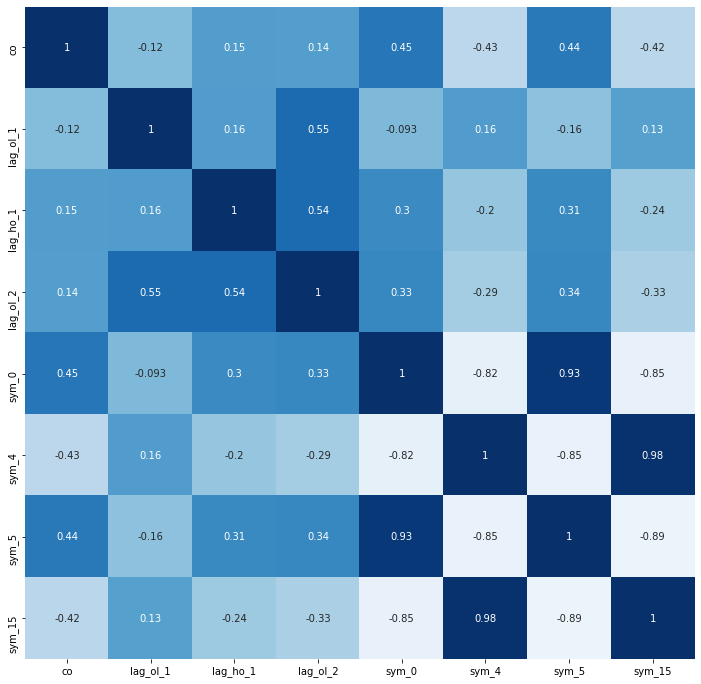

In [25]:
# correlation matrix in general
f_corr = exp_3.corr()

# correlation matrix with target
ft_corr = pd.concat([exp_3['co'],
                     exp_3.iloc[:, 1:]], ignore_index=True, axis=1).corr()
exp_corr = exp_3.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(exp_corr, cmap='Blues', annot=True, cbar=False, center=0.0, fmt='.2g')

<AxesSubplot:>

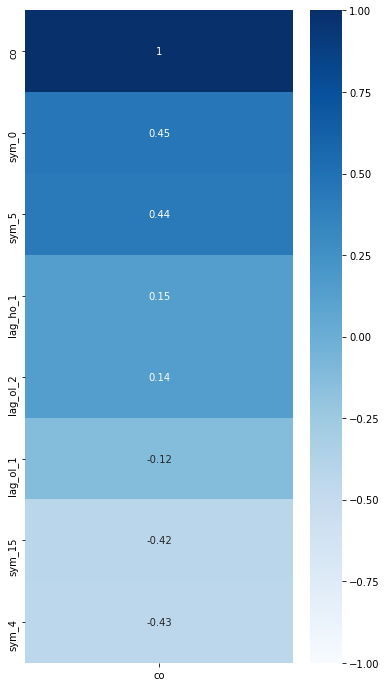

In [26]:
plt.figure(figsize=(6, 12))
sns.heatmap(exp_corr[[y_hat]].sort_values(by=y_hat, ascending=False),
            vmin=-1, vmax=1,  annot=True, cmap='Blues')

# <font color= #6B6B6B> <font size = 6> 5. Models with experiments </font>


<hr style="border:0.02in solid gray"> </hr>

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score
# data to experiment
experiments = {1: exp_1, 2: exp_2, 3: exp_3}

## EXPERIMENT 1: Just Symbolic Features

In [ ]:
# data to experiment
exp = 1

# data split
data = fn.data_split(p_data=experiments[exp], p_target='co', p_split=0.8)
x_train = data['train_x']
val_x = data['val_x']
y_train = data['train_y']
val_y = data['val_y']

# model parameters
learning_rate = 0.001
epochs = 500
batch = 16
neurons = x_train.shape[1]

# Neural net
model = Sequential()
model.add(Dense(neurons, activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=learning_rate)
model.compile(loss = 'mean_squared_error', optimizer=opt, metrics=['mse'])

# fit the model
model_history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,
                          validation_data=(val_x, val_y), verbose=1)

# scores
model_score_t = model.evaluate(x_train, y_train)
model_score_v = model.evaluate(val_x, val_y)

print('Train loss:', model_score_t[0])
print('Train mse:', model_score_t[1])
print('Val loss:', model_score_v[0])
print('Val mse:', model_score_v[1])

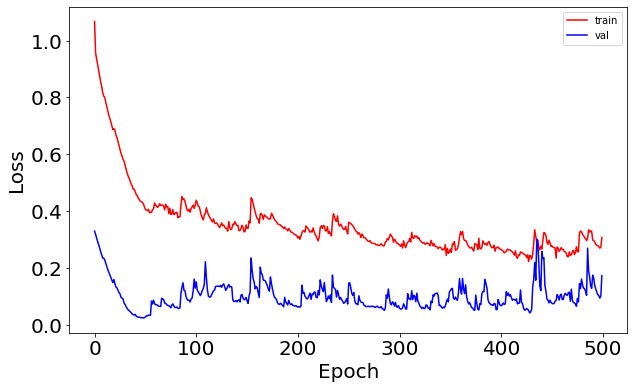

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['loss'], 'r', label='train')
ax.plot(model_history.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

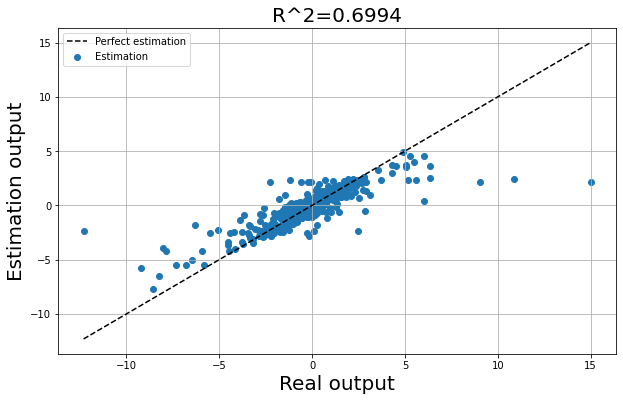

In [52]:
y_hat = model.predict(x_train)
R2_score = r2_score(y_train, y_hat)

x_min, x_max = min(y_train),max(y_train)
x_line = np.linspace(x_min, x_max)

fig = plt.figure(figsize=(10,6))
plt.scatter(y_train,y_hat,label='Estimation')
plt.plot(x_line, x_line, 'k--', label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

## EXPERIMENT 2: Original Data and Symbolic Features

In [ ]:
# data to experiment
exp = 2

# data split
data = fn.data_split(p_data=experiments[exp], p_target='co', p_split=0.8)
x_train = data['train_x']
val_x = data['val_x']
y_train = data['train_y']
val_y = data['val_y']

# model parameters
learning_rate = 0.001
epochs = 500
batch = 16
neurons = x_train.shape[1]

# Neural net
model = Sequential()
model.add(Dense(neurons, activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=learning_rate)
model.compile(loss = 'mean_squared_error', optimizer=opt, metrics=['mse'])

# fit the model
model_history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,
                          validation_data=(val_x, val_y), verbose=1)

# scores
model_score_t = model.evaluate(x_train, y_train)
model_score_v = model.evaluate(val_x, val_y)

print('Train loss:', model_score_t[0])
print('Train mse:', model_score_t[1])
print('Val loss:', model_score_v[0])
print('Val mse:', model_score_v[1])

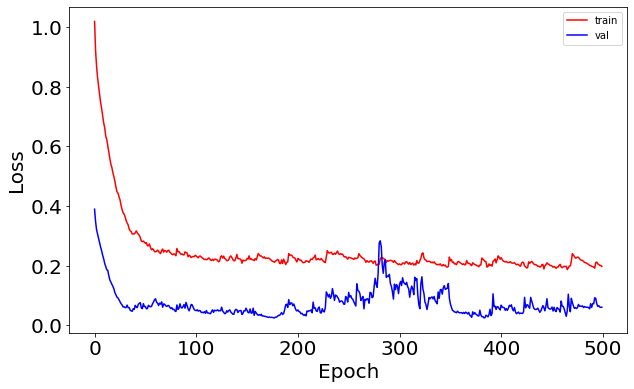

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['loss'], 'r', label='train')
ax.plot(model_history.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

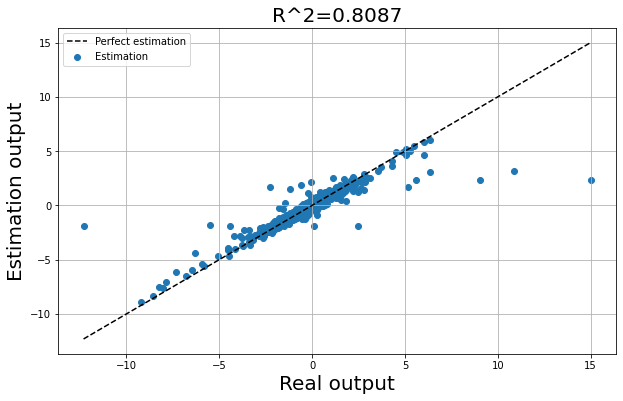

In [46]:
y_hat = model.predict(x_train)
R2_score = r2_score(y_train, y_hat)

x_min, x_max = min(y_train),max(y_train)
x_line = np.linspace(x_min, x_max)

fig = plt.figure(figsize=(10,6))
plt.scatter(y_train,y_hat,label='Estimation')
plt.plot(x_line, x_line, 'k--', label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.show()

## Experiment 3: Just 'important' variables from Original Data & Symbolic Features

In [ ]:
# data to experiment
exp = 3

# data split
data = fn.data_split(p_data=experiments[exp], p_target='co', p_split=0.8)
x_train = data['train_x']
val_x = data['val_x']
y_train = data['train_y']
val_y = data['val_y']

# model parameters
learning_rate = 0.001
epochs = 500
batch = 16
neurons = x_train.shape[1]

# Neural net
model = Sequential()
model.add(Dense(neurons, activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=learning_rate)
model.compile(loss = 'mean_squared_error', optimizer=opt, metrics=['mse'])

# fit the model
model_history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,
                          validation_data=(val_x, val_y), verbose=1)

# scores
model_score_t = model.evaluate(x_train, y_train)
model_score_v = model.evaluate(val_x, val_y)

print('Train loss:', model_score_t[0])
print('Train mse:', model_score_t[1])
print('Val loss:', model_score_v[0])
print('Val mse:', model_score_v[1])

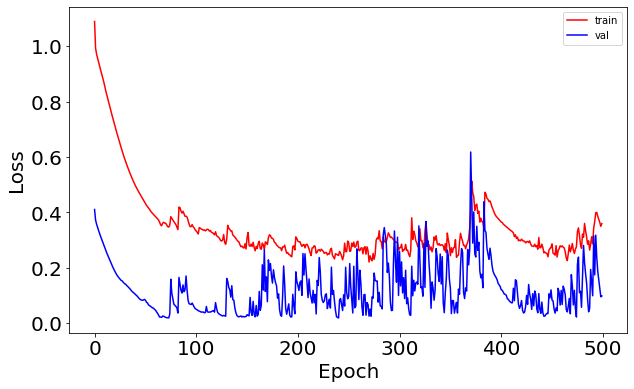

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['loss'], 'r', label='train')
ax.plot(model_history.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

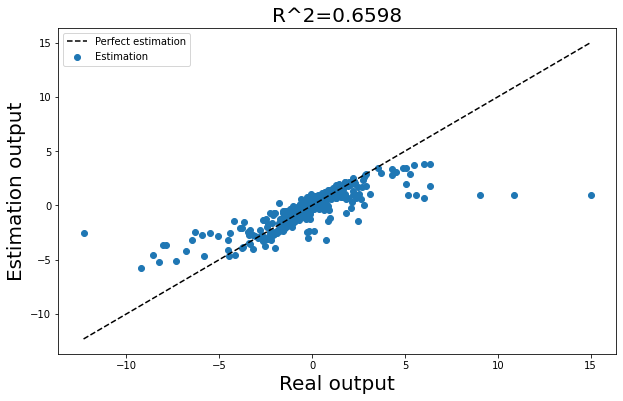

In [49]:
y_hat = model.predict(x_train)
R2_score = r2_score(y_train, y_hat)

x_min, x_max = min(y_train),max(y_train)
x_line = np.linspace(x_min, x_max)

fig = plt.figure(figsize=(10,6))
plt.scatter(y_train,y_hat,label='Estimation')
plt.plot(x_line, x_line, 'k--', label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.show()